In [ ]:
# In this notebook we will solve a classification problem, the most frequent in machine learning
# We will use two methods:
# (i) logistic regression that should be familiar now, and 
# (ii) we get familiar with performing classification with decision/classification trees
# In the analysis, we will work with a dataset to predict which users will be interested in an advertisement
# In the data we have the following variables:

# daily_time_spent: consumer time on site in minutes
# age: cutomer age in years
# avg_income: Avg. Income of geographical area of consumers
# daily_internet_use: Avg. minutes a day consumer is on the internet
# gender: 0 female, 1 male
# timestamp: Time at which consumer clicked on advertisement or closed window
# clicekd_on_ad: 0 or 1 indicated clicking on the advertisement

In [2]:
# Import necessary libraries (some will be done later)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Some functions from sklearn package that we should already be familiar with
# building logistic regression models
from sklearn.linear_model import LogisticRegression
# creating training and test set
from sklearn.model_selection import train_test_split
# look at classification performance
from sklearn.metrics import classification_report,confusion_matrix

### Data and descriptive analysis

In [3]:
# Load the data and look at the first few rows

advertising = pd.read_csv('advertisement_data.csv')
advertising.head()

,daily_time_spent,age,avg_income,daily_internet_use,gender,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [4]:
# The first step is always to try to understand the data, i.e. performing descriptive analysis
# We can look at the type of variables
# Except for timestamp we have only numeric variables
# We can also see that there are no missing values, and 1000 datapoints

advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   daily_time_spent    1000 non-null   float64
 1   age                 1000 non-null   int64  
 2   avg_income          1000 non-null   float64
 3   daily_internet_use  1000 non-null   float64
 4   gender              1000 non-null   int64  
 5   timestamp           1000 non-null   object 
 6   clicked_on_ad       1000 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 54.8+ KB


In [5]:
# We can look at the statistical measures of the numeric columns

advertising.describe()

,daily_time_spent,age,avg_income,daily_internet_use,gender,clicked_on_ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:xlabel='daily_time_spent', ylabel='Count'>

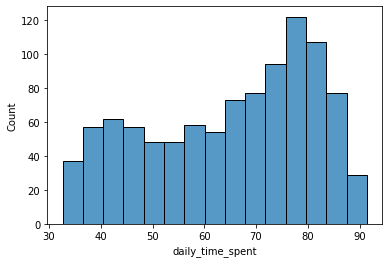

In [6]:
# We can look at some visualization
# Histogram is frequently used for numeric variables

sns.histplot(advertising['daily_time_spent'], bins = 15)

<AxesSubplot:xlabel='clicked_on_ad', ylabel='daily_time_spent'>

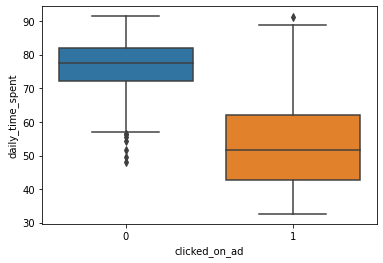

In [7]:
# Probably the most useful plot is boxplot when combining two variables
# For example we want to check whether interent use is different for people who did and did not click on the advertisement
# As we can see, people who clicked on the ad, spend much less time on the site in general

sns.boxplot(x = 'clicked_on_ad', y = 'daily_time_spent', data = advertising)

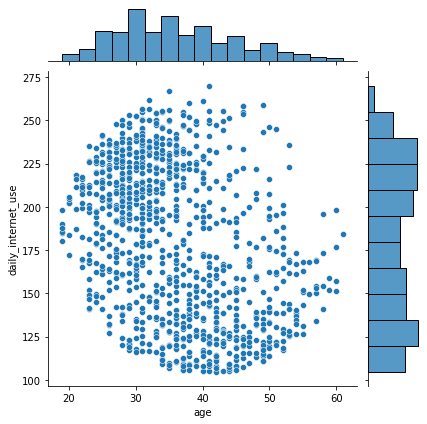

In [8]:
# We can also use jointplot to understand the relationship between two variables

sns.jointplot(x='age',y='daily_internet_use',data=advertising)

In [9]:
# In a complete analysis, we would need to look at missing values, outliers, convert categorical variables etc.
# We do not have any of these in the dataset
# But before we start building machine learning models, we drop timestamp as we will not make us of it

advertising.drop(['timestamp'], axis = 1, inplace = True)

In [10]:
advertising.head()

,daily_time_spent,age,avg_income,daily_internet_use,gender,clicked_on_ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


### Logistic regression model

In [11]:
# First we separate the data into predictors and outcome columns
X = advertising[['daily_time_spent', 'age', 'avg_income','daily_internet_use', 'gender']]
y = advertising['clicked_on_ad']

# Then we crate training and test set, with 25% of the data in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Finally we initialize and fit the logistic regression model
adv_logistic = LogisticRegression()
adv_logistic.fit(X_train,y_train)

LogisticRegression()

In [12]:
# We can look at the coefficients
adv_logistic.coef_

array([[-5.69617590e-02,  2.67075856e-01, -1.47028088e-05,
        -2.79508710e-02,  1.85030237e-03]])

In [13]:
# To assess the performance, we can create predictions for the test data
pred_logistic = adv_logistic.predict(X_test)

# And create the classification report for prediction and original test data outcomes
print(confusion_matrix(y_test,pred_logistic))
print(classification_report(y_test,pred_logistic))

[[117   3]
 [ 25 105]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       120
           1       0.97      0.81      0.88       130

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250



### Classification tree model

In [14]:
# In the following, we will try to build a model using classification trees and 
# see how the performance compares to logistic regression
# We will also look at how to draw the tree and understand the reasoning for predictions
# We will laso look at what parameters we can set when building the tree models

# Here are some libraries we will need
# to build classification tree models
from sklearn.tree import DecisionTreeClassifier

# We also import the whole tree set, to minimize typing later
from sklearn import tree

# We can initialize a decision tree with default parameters
# Except, it is better to set random seed also here to get always the same results
adv_tree = DecisionTreeClassifier(random_state = 42)

In [15]:
# Then we can fit the training data

tree_model = adv_tree.fit(X_train,y_train)

In [16]:
# To assess the performance as above, we can create predictions for the test data
pred_tree = tree_model.predict(X_test)

# And create the classification report for prediction and original test data outcomes
# We can see that in terms of overall performance, we do better with decision trees

print(confusion_matrix(y_test,pred_tree))
print(classification_report(y_test,pred_tree))

[[112   8]
 [  9 121]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       120
           1       0.94      0.93      0.93       130

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [17]:
# The easiest, but not the most visually pleasing way, is to print out the tree in terms of the rules
# We can set the features names
print(tree.export_text(adv_tree, feature_names = list(X.columns)))

|--- daily_internet_use <= 178.43
|   |--- daily_time_spent <= 71.88
|   |   |--- avg_income <= 77441.28
|   |   |   |--- daily_internet_use <= 175.82
|   |   |   |   |--- class: 1
|   |   |   |--- daily_internet_use >  175.82
|   |   |   |   |--- daily_time_spent <= 55.40
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- daily_time_spent >  55.40
|   |   |   |   |   |--- class: 0
|   |   |--- avg_income >  77441.28
|   |   |   |--- class: 0
|   |--- daily_time_spent >  71.88
|   |   |--- daily_internet_use <= 161.39
|   |   |   |--- daily_time_spent <= 86.54
|   |   |   |   |--- age <= 28.00
|   |   |   |   |   |--- daily_time_spent <= 77.98
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- daily_time_spent >  77.98
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  28.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- daily_time_spent >  86.54
|   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- gender >  0.50


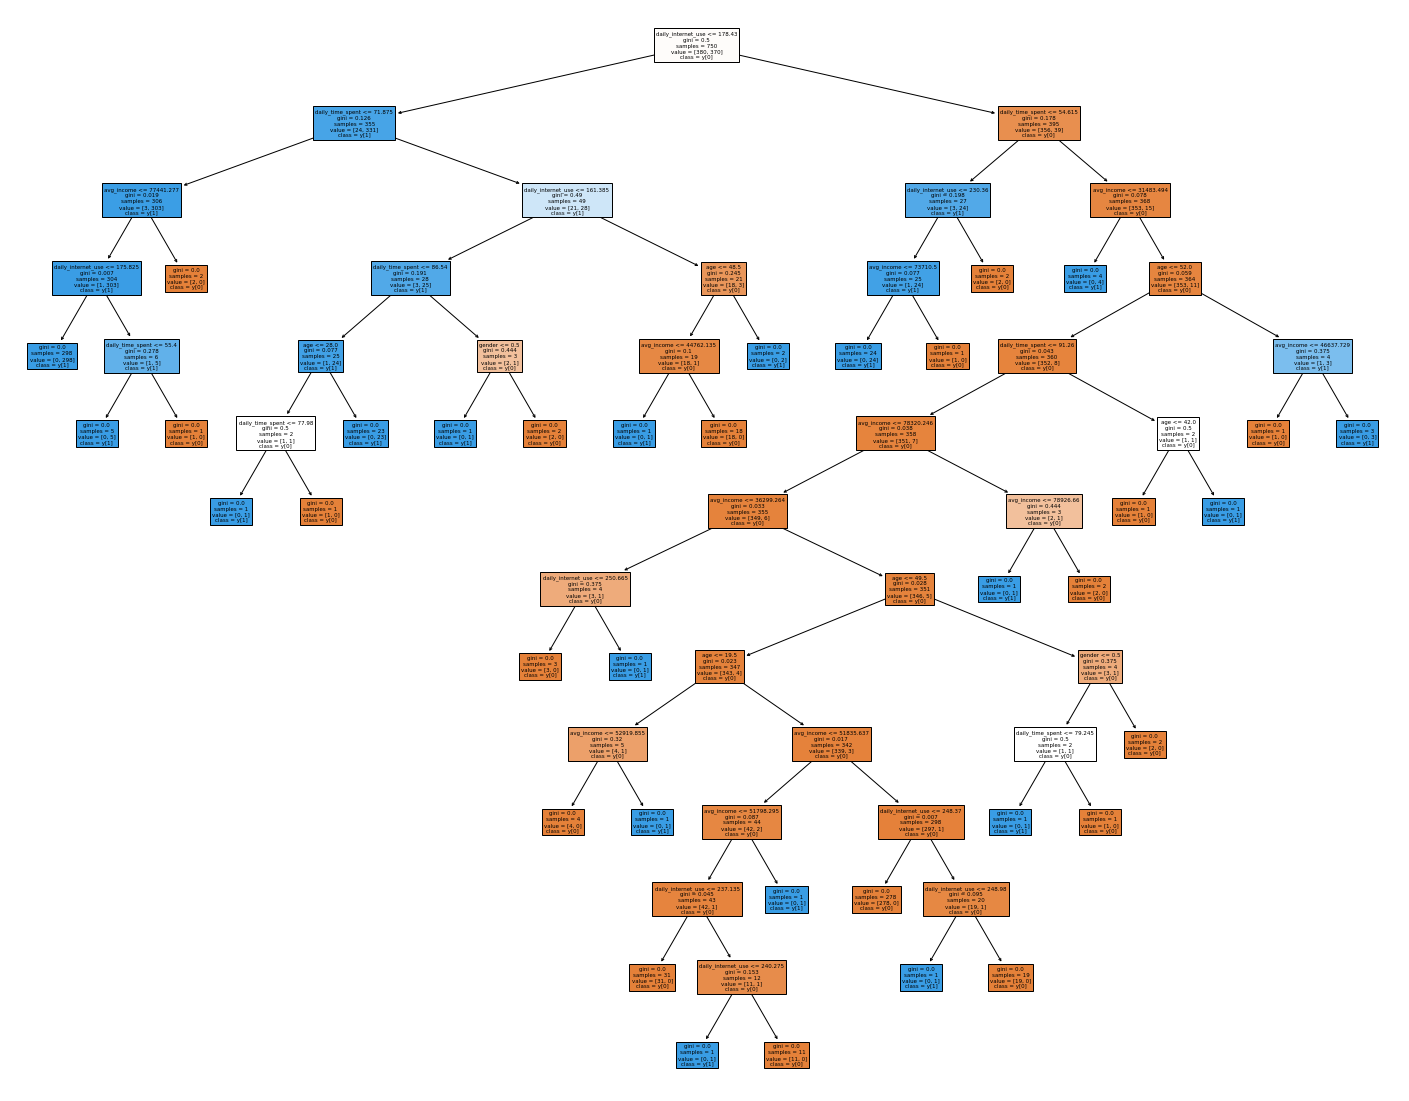

In [18]:
# We can createa visual representation of the tree model using plot_tree
# We extract feature and output names from the data

fig = plt.figure(figsize=(25,20))

tree.plot_tree(adv_tree, feature_names=X.columns,  class_names=True,
                   filled=True)
fig.savefig("decistion_tree.png")
plt.show()

In [19]:
# In order to have a nicer visualization, we need another library
# In order to import it, you have to install it first as we have done before
# In Anaconda prompt, you have to install two separate packages as follows

# conda install -c anaconda python-graphviz

# conda install -c anaconda pydot

# and you will have it available

import graphviz

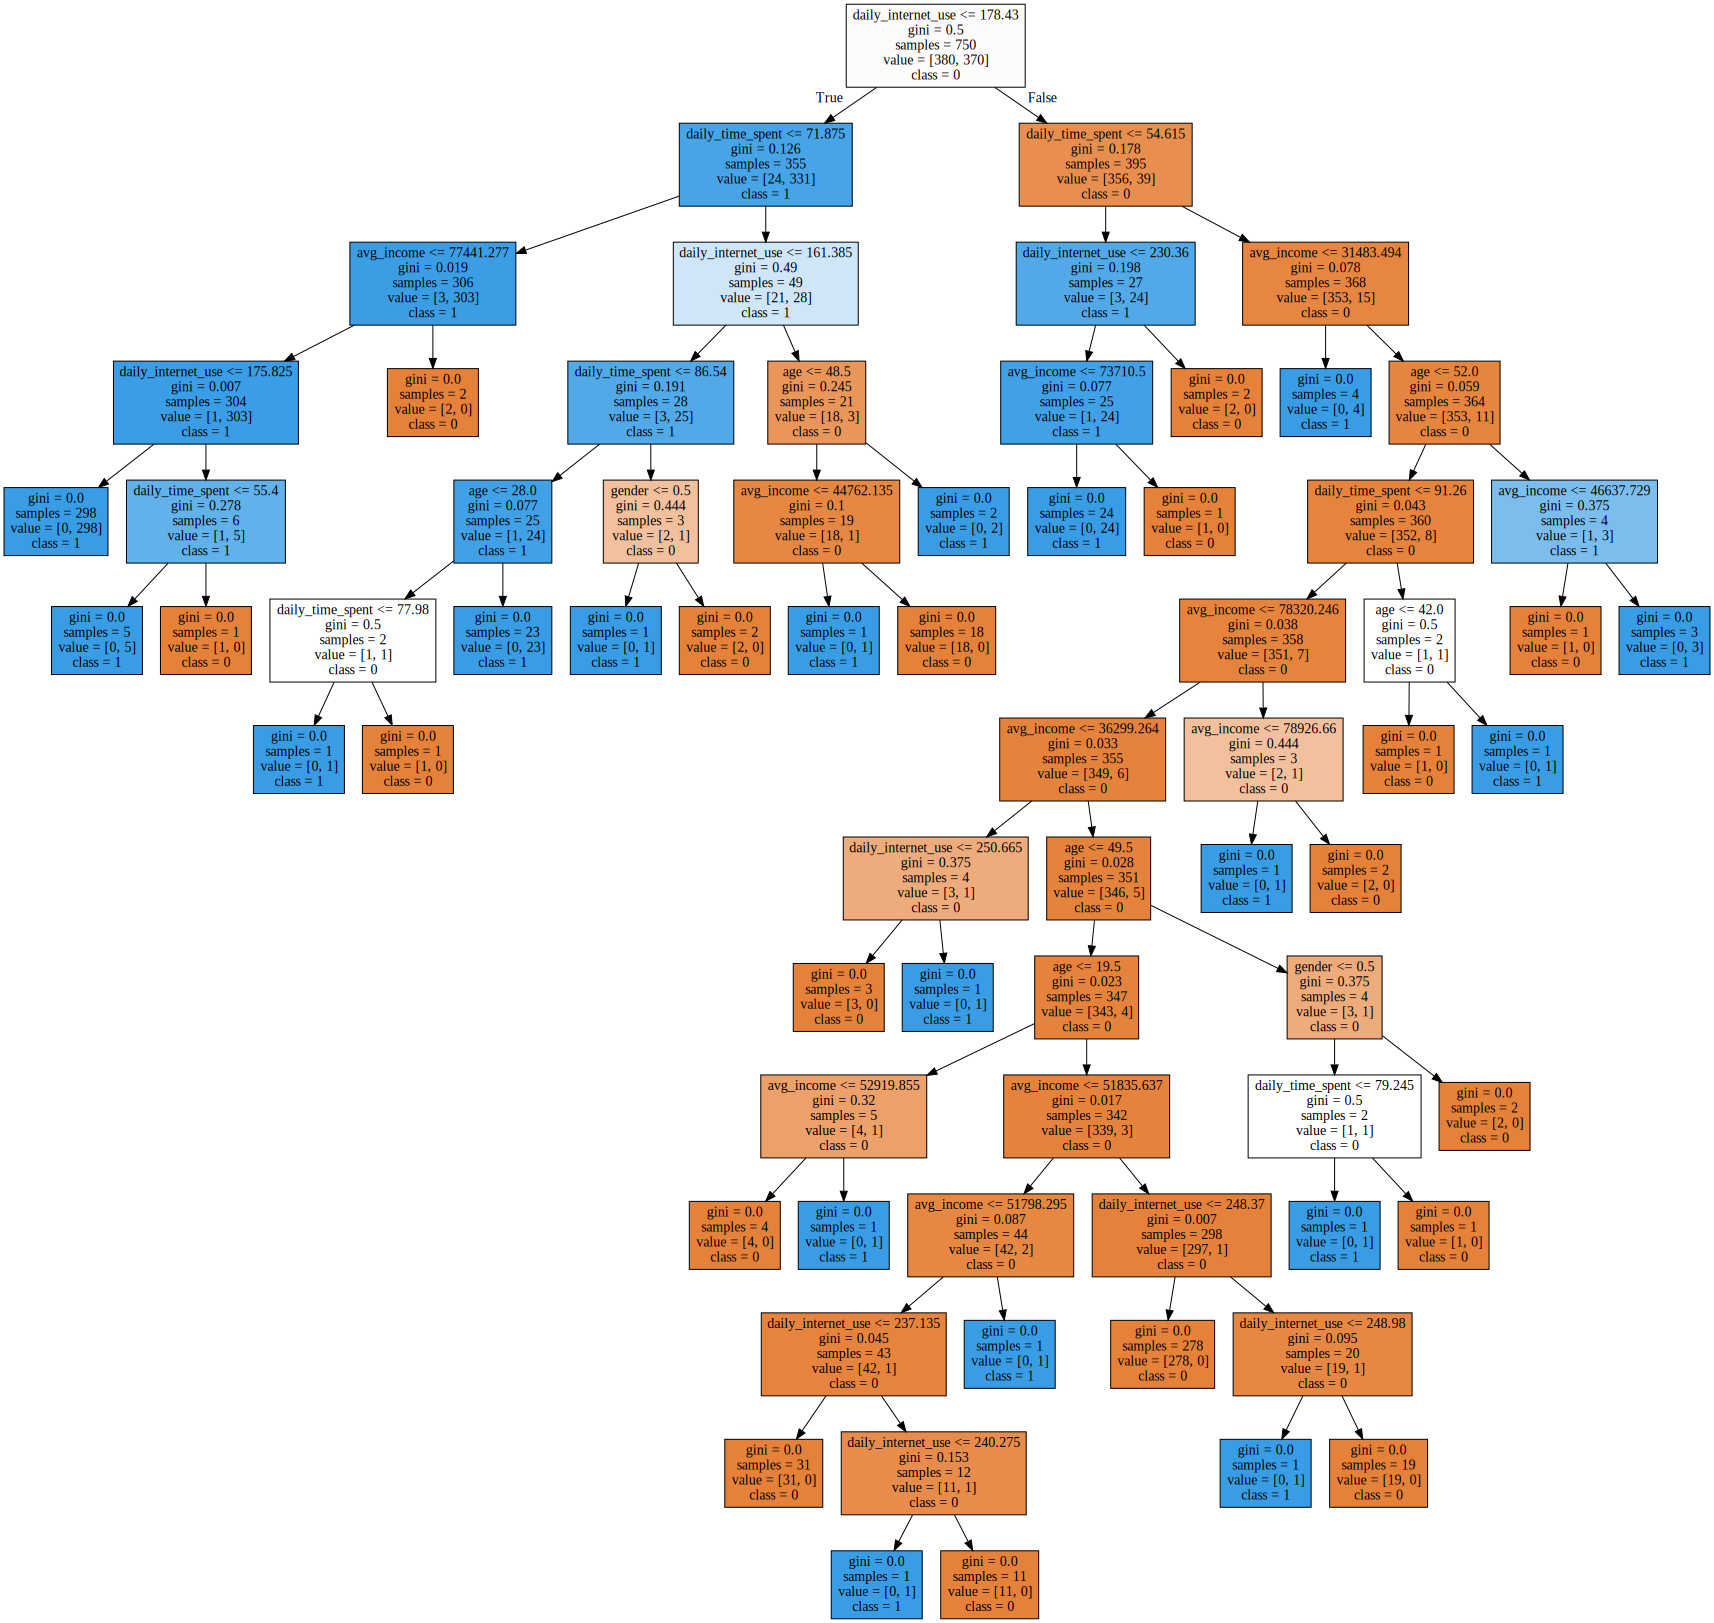

In [20]:
# First we need to convert the tree to the right format

viz_tree = tree.export_graphviz(adv_tree, out_file=None, feature_names=X.columns,  class_names=['0', '1'], filled=True)

# Then we can draw the tree

graph = graphviz.Source(viz_tree) 

# Save it in an external file
graph.render("viz_tree")

graph

In [22]:
# As it was discussed in the lecture, there are several steps in creating an optimal tree
# We need to decide when to stop building, how many data points we can have to still create leaves 
# what is the maximum number of steps etc.
# You can find a description of all the important parameters here
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# The most important ones:
# - max_depth: maximum depth of the tree (i.e. how many splits are allowed)
# - min_samples_split: the minimum number of samples required to split an internal node (i.e. if it is 10, we do not 
# split anymore if there are less then 10 datapoints left in a leaf, even if they are not of the same class)
# class_weight: weights associated to classes, i.e. we can specify that identifying one class is more important

# Here we can experiment with these parameters
# Default setting max_depth = None, min_samples_split = 2, class_weight= {0:0.5, 1:0.5}, accuracy 0.93
# Changing max_depth: max_depth = 2, min_samples_split = 2, class_weight= {0:0.5, 1:0.5}, accuracy 0.90
# Changing min_samples_split: max_depth = 6, min_samples_split = 4, class_weight= {0:0.5, 1:0.5}, accuracy 0.90
# Changing weight: # Changing max_depth: max_depth = None, min_samples_split = 2, class_weight= {0:0, 1:1}, accuracy 0.52

adv_tree = DecisionTreeClassifier(max_depth = None, min_samples_split = 2, class_weight= {0:0.5, 1:0.5}, random_state = 42)
tree_model = adv_tree.fit(X_train,y_train)
pred_tree = tree_model.predict(X_test)
print(confusion_matrix(y_test,pred_tree))
print(classification_report(y_test,pred_tree))

[[112   8]
 [  9 121]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       120
           1       0.94      0.93      0.93       130

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

